Побудувати двонаправлену RNN для розрахунку функції із шумом. 
Підібрати власну архитектуру, кількість шарів, функції активації. 
Побудувати графік.
N = 10000
data = np.array([np.функція for x in range(N)]) + 0.1*np.random.randn(N)
В якості функції взяти тригонометричну функцію, наприклад 
𝑐𝑜𝑠(3𝑥) , 𝑠𝑖𝑛(𝑥 ∕ 5) , 𝑠𝑖𝑛(𝑥 + 3) ∕ 2 і тд.



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 6, 128)           33792     
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 6, 128)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 75,073
Trainable params: 75,073
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
313/313 [==============================] 

1/1 [==============================] - 0s 41ms/step


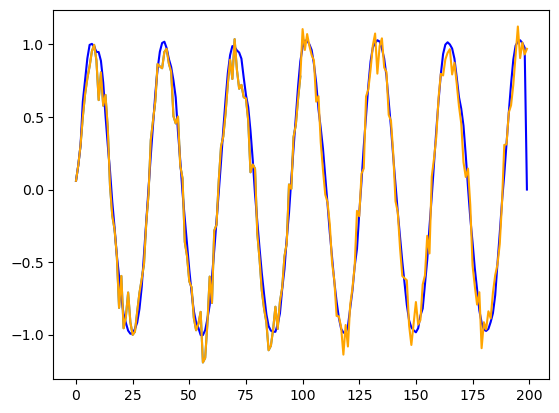

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, LSTM, Input, Dropout, Bidirectional
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

N = 10000
data = np.array([np.sin(x/5) for x in range(N)]) + 0.1*np.random.randn(N)
plt.plot(data[:100])

off = 3
length = off*2+1

# Створення вхідних даних у правильній формі для LSTM
X = np.array([np.hstack((data[i:i+off], data[i+off+1:i+length])) for i in range(N-length)])
X = X.reshape(X.shape[0], X.shape[1], 1)  # Додаємо одиничну розмірність для збігу з очікуваною формою LSTM
Y = data[off:N-off-1]

model = Sequential()
model.add(Input((length-1, 1)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(1, activation='linear'))
model.summary()

model.compile(loss='mean_squared_error', optimizer=Adam(0.01))

history = model.fit(X, Y, batch_size=32, epochs=10)

# Передбачення
M = 200
XX = np.zeros(M)
XX[:off] = data[:off]
for i in range(M-off-1):
  x = np.hstack((XX[i:i+off], data[i+off+1:i+length]))
  x = np.expand_dims(x, axis=0)
  y = model.predict(x)
  XX[i+off] = y

# Побудова графіку
plt.plot(XX[:M], color='blue')
plt.plot(data[:M], color='orange')
plt.show()

